# **Intersection analysis**

This notebook contains the code to identify genes shared among the **Xenium panel**, the differentially expressed genes in **FA‑HNSCC tumors**, the differentially expressed genes in **non‑FA HNSCC tumors**, and literature genes. The genes signatures from literature comes from: 

+ [Single-cell multi-stage spatial evolutional map of esophageal carcinogenesis](https://www.cell.com/cancer-cell/fulltext/S1535-6108(25)00061-3)
+ [Genomic signature of Fanconi anaemia DNA repair pathway deficiency in cancer](https://www.nature.com/articles/s41586-022-05253-4)

In [1]:
# Libraries to import

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3
from upsetplot import from_contents, UpSet
import os

In [2]:
# Show files in the current directory
os.listdir()

['FA_SCC_filtered_down_genes.csv',
 'FA_SCC_filtered_up_genes.csv',
 'intersection_literature.ipynb',
 'signature_fanconi_hnscc_agata.csv',
 'signature_score_pEMT.csv',
 'signature_score_scTSK.csv',
 'signature_spatial_escc.csv',
 'signature_tim3.csv',
 'tim3_escc_',
 'Xenium_hIO_v1_metadata.csv']

In [22]:
# Load all data sets
df_fahnscc = pd.read_csv("FA_SCC_filtered_up_genes.csv")
df_nonfahnscc = pd.read_csv("FA_SCC_filtered_down_genes.csv")
df_xenium_immunoncology = pd.read_csv("Xenium_hIO_v1_metadata.csv")
df_signature_scores_scTSK =  pd.read_csv("signature_score_scTSK.csv")
df_signature_scores_pEMT =  pd.read_csv("signature_score_pEMT.csv")
df_tim3_signature = pd.read_csv("signature_tim3.csv")
df_spatial_escc = pd.read_csv("signature_spatial_escc.csv")
df_signature_fanconi_hnscc_agata = pd.read_csv("signature_fanconi_hnscc_agata.csv")

In [23]:
# Show colnames for each dataframe
print("> FA-HNSCC columns:", df_fahnscc.columns)
print("> Non-FA HNSCC columns:", df_nonfahnscc.columns)
print("> Xenium Immuno-Oncology columns:", df_xenium_immunoncology.columns)
print("> Signature Scores scTSK columns:", df_signature_scores_scTSK.columns)
print("> Signature Scores pEMT columns:", df_signature_scores_pEMT.columns)
print("> TIM3 Signature columns:", df_tim3_signature.columns)
print("> Spatial ESCC columns:", df_spatial_escc.columns)
print("> Fanconi HNSCC Agata Signature columns:", df_signature_fanconi_hnscc_agata.columns)

> FA-HNSCC columns: Index(['gene_id', 'gene_symbol', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat',
       'pvalue', 'padj'],
      dtype='object')
> Non-FA HNSCC columns: Index(['gene_id', 'gene_symbol', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat',
       'pvalue', 'padj'],
      dtype='object')
> Xenium Immuno-Oncology columns: Index(['Gene', 'Ensemble ID', 'Num_Probesets', 'Codewords', 'Annotation'], dtype='object')
> Signature Scores scTSK columns: Index(['scTSK_Score'], dtype='object')
> Signature Scores pEMT columns: Index(['pEMTt_score'], dtype='object')
> TIM3 Signature columns: Index(['Gene', 'Functional module', 'Main function',
       'Relationship to TIM-3 / exhaustion', 'Dominant cells'],
      dtype='object')
> Spatial ESCC columns: Index(['Gene', 'Function_biological process'], dtype='object')
> Fanconi HNSCC Agata Signature columns: Index(['Gene_EMT', 'Gene_Immune'], dtype='object')


In [24]:
# Make a list of gene sets considering only the columns with gene symbols
genes_fahnscc = df_fahnscc['gene_symbol'].tolist()
genes_nonfahnscc = df_nonfahnscc['gene_symbol'].tolist()
genes_xenium_immunoncology = df_xenium_immunoncology['Gene'].tolist()
genes_scTSK_score = df_signature_scores_scTSK['scTSK_Score'].tolist()
genes_pEMT_score = df_signature_scores_pEMT['pEMTt_score'].tolist()
genes_tim3_signature = df_tim3_signature['Gene'].tolist()
genes_spatial_escc = df_spatial_escc['Gene'].tolist()
genes_emt_fanconi_hnscc_agata = df_signature_fanconi_hnscc_agata['Gene_EMT'].tolist()
genes_immune_fanconi_hnscc_agata = df_signature_fanconi_hnscc_agata['Gene_Immune'].tolist()

# Print first 5 genes from each list to verify
print("> FA-HNSCC genes:", genes_fahnscc[:5])
print("> Non-FA HNSCC genes:", genes_nonfahnscc[:5])
print("> Xenium Immuno-Oncology genes:", genes_xenium_immunoncology[:5])
print("> scTSK Score genes:", genes_scTSK_score[:5])
print("> pEMT Score genes:", genes_pEMT_score[:5])
print("> TIM3 Signature genes:", genes_tim3_signature[:5])
print("> Spatial ESCC genes:", genes_spatial_escc[:5])
print("> Fanconi HNSCC Agata EMT genes:", genes_emt_fanconi_hnscc_agata[:5])
print("> Fanconi HNSCC Agata Immune genes:", genes_immune_fanconi_hnscc_agata[:5])


> FA-HNSCC genes: ['SCARNA7', 'SCARNA10', 'C12orf50', 'RPL21', 'H4C12']
> Non-FA HNSCC genes: ['TFAP4', 'ZNF384', 'TAF7', 'ATP5F1B', 'ERICH1']
> Xenium Immuno-Oncology genes: ['A2M', 'ACE2', 'ACTA2', 'ACTB', 'ADAM28']
> scTSK Score genes: ['MMP10', 'PTHLH', 'FEZ1', 'IL24', 'KCNMA1']
> pEMT Score genes: ['SERPINE1', 'TGFBI', 'LAMC2', 'LAMA3', 'MMP10']
> TIM3 Signature genes: ['HAVCR2', 'LGALS9', 'CEACAM1', 'HMGB1', 'BAG6']
> Spatial ESCC genes: ['JAG1', 'NOTCH1', 'SOX2', 'SPP1', 'CXCL1']
> Fanconi HNSCC Agata EMT genes: ['ZEB1', 'ZEB2', 'SNAI1', 'TWIST1', 'TWIST2']
> Fanconi HNSCC Agata Immune genes: ['STING1', 'PTGFR', 'PTGS2', 'TRAF1', 'TRAF5']


In [25]:
# Show number of genes in each set
print("Number of FA-HNSCC genes:", len(genes_fahnscc))
print("Number of Non-FA HNSCC genes:", len(genes_nonfahnscc))
print("Number of Xenium Immuno-Oncology genes:", len(genes_xenium_immunoncology))
print("Number of scTSK Score Component Genes:", len(genes_scTSK_score))
print("Number of pEMT Score Component Genes:", len(genes_pEMT_score))
print("Number of TIM3 Signature genes:", len(genes_tim3_signature))
print("Number of Spatial ESCC genes:", len(genes_spatial_escc))
print("Number of Fanconi HNSCC Agata EMT genes:", len(genes_emt_fanconi_hnscc_agata))
print("Number of Fanconi HNSCC Agata Immune genes:", len(genes_immune_fanconi_hnscc_agata))

Number of FA-HNSCC genes: 3865
Number of Non-FA HNSCC genes: 4399
Number of Xenium Immuno-Oncology genes: 380
Number of scTSK Score Component Genes: 100
Number of pEMT Score Component Genes: 26
Number of TIM3 Signature genes: 67
Number of Spatial ESCC genes: 28
Number of Fanconi HNSCC Agata EMT genes: 10
Number of Fanconi HNSCC Agata Immune genes: 10


In [7]:
# Literature genes
genes_emt = [
    "ZEB1", "ZEB2", "SNAI1", "TWIST1", "TWIST2", "SOX2", "HEY1", "FGFR1"
]

print(len(genes_emt))

8


In [8]:
# Literature genes
genes_immune = [ 
    "STING1", "PTGFR", "PTGS2", "TRAF1", "TRAF5", "IL33",
    "VCAM1", "CCL2", "EDA2R", "CXCL12"
]

print(len(genes_immune))

10


In [26]:
# Clean data frames

def clean_genes(seq):
    s = pd.Series(seq)
    s = s.dropna()                    # quita NaN/None
    s = s.astype(str).str.strip()     # convierte a str y quita espacios
    s = s[s != '']                    # quita strings vacíos
    s = s[~s.str.lower().isin(['nan','none'])]  # por si hay la cadena 'nan' o 'none'
    return set(s)

genes_fahnscc = clean_genes(genes_fahnscc)
genes_nonfahnscc = clean_genes(genes_nonfahnscc)

shared_genes = genes_fahnscc & genes_nonfahnscc
print("Shared genes (cleaned):", shared_genes)

Shared genes (cleaned): set()


In [27]:
# Make list to contains 
set1 = set(genes_fahnscc)
set2 = set(genes_nonfahnscc)
set3 = set(genes_xenium_immunoncology)
set4 = set(genes_scTSK_score)
set5 = set(genes_pEMT_score)
set6 = set(genes_emt_fanconi_hnscc_agata)   
set7 = set(genes_immune_fanconi_hnscc_agata)
set8 = set(genes_tim3_signature)
set9 = set(genes_spatial_escc)

c:\Users\jhona\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\jhona\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original objec

<Figure size 1000x1000 with 0 Axes>

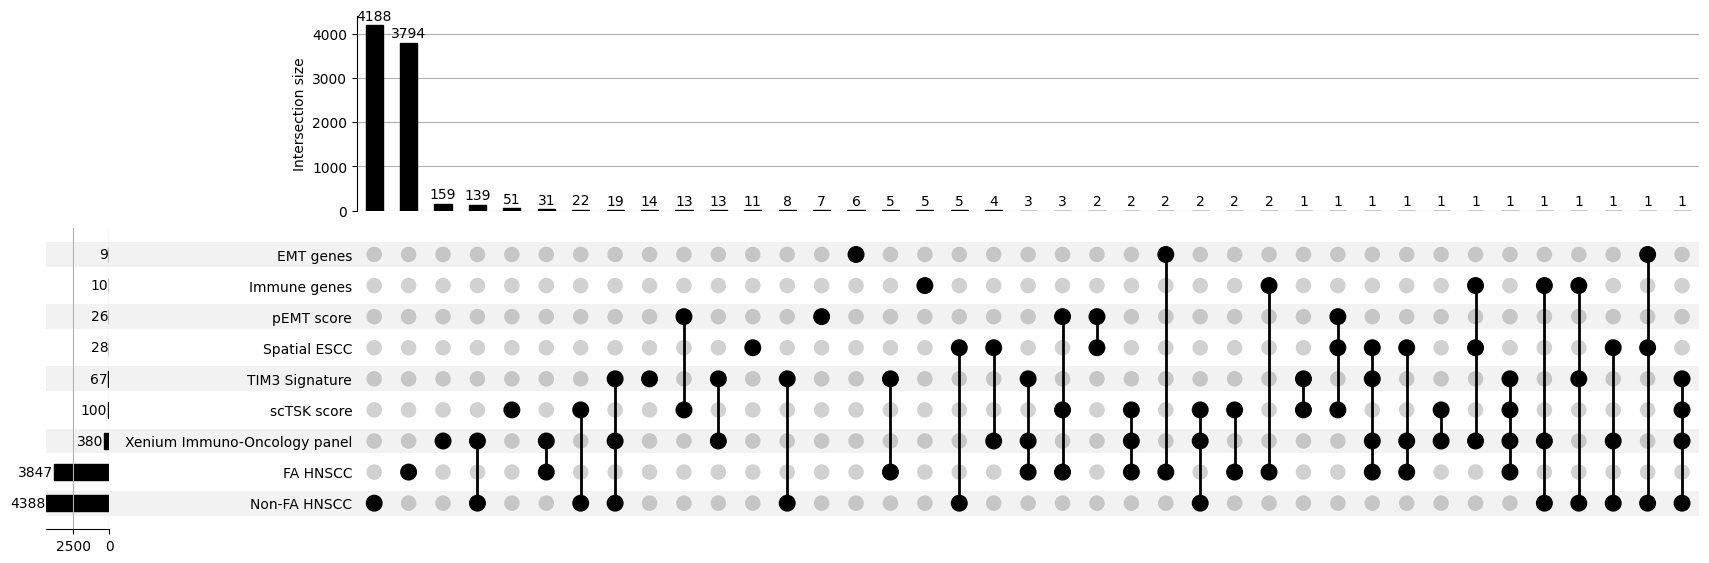

In [28]:
# Visualization of intersections using UpSet plot
contents = {
    'FA HNSCC': set(genes_fahnscc),
    'Non-FA HNSCC': set(genes_nonfahnscc),
    'Xenium Immuno-Oncology panel': set(genes_xenium_immunoncology),
    'scTSK score': set(genes_scTSK_score),
    'pEMT score': set(genes_pEMT_score),
    'EMT genes': set(genes_emt_fanconi_hnscc_agata),  
    'Immune genes': set(genes_immune_fanconi_hnscc_agata),
    'TIM3 Signature': set(genes_tim3_signature),
    'Spatial ESCC': set(genes_spatial_escc)
}

upset_data = from_contents(contents)
upset = UpSet(upset_data, subset_size='count', show_counts='%d', 
              sort_by='cardinality', sort_categories_by='cardinality')
plt.figure(figsize=(10, 10))

#plt.title("UpSet Plot of Gene Set Intersections")
upset.plot()
#plt.savefig("upset_plot_all.png", dpi=900, bbox_inches='tight')  # guarda el plot como PNG
plt.show()

In [29]:
# Make list to contains 
set1 = set(genes_fahnscc)
set2 = set(genes_nonfahnscc)
set3 = set(genes_xenium_immunoncology)
set4 = set(genes_scTSK_score)
set5 = set(genes_pEMT_score)
set6 = set(genes_emt_fanconi_hnscc_agata)   
set7 = set(genes_immune_fanconi_hnscc_agata)
set8 = set(genes_tim3_signature)
set9 = set(genes_spatial_escc)

In [30]:
# Export genes for each intersection to text files
import itertools
from pathlib import Path

# Create directory for output files
output_dir = Path("gene_intersections_output")
output_dir.mkdir(exist_ok=True)

# Function to get intersection of multiple sets
def get_intersection(*sets):
    if len(sets) == 1:
        return sets[0]
    result = sets[0]
    for s in sets[1:]:
        result = result.intersection(s)
    return result

# Function to get genes unique to a specific combination
def get_genes_for_combination(combination, all_sets):
    # Get intersection of sets in the combination
    selected_sets = [all_sets[name] for name in combination]
    intersection_genes = get_intersection(*selected_sets)
    
    # Remove genes that appear in any other set not in the combination
    other_sets = [all_sets[name] for name in all_sets.keys() if name not in combination]
    if other_sets:
        for other_set in other_sets:
            intersection_genes = intersection_genes - other_set
    
    return intersection_genes

# Dictionary with all gene sets
all_gene_sets = {
    'FA_HNSCC': set(genes_fahnscc),
    'Non_FA_HNSCC': set(genes_nonfahnscc),
    'Immuno_Oncology': set(genes_xenium_immunoncology),
    'scTSK_score': set(genes_scTSK_score),
    'pEMT_score': set(genes_pEMT_score),
    'EMT_genes': set(genes_emt_fanconi_hnscc_agata),  
    'Immune_genes': set(genes_immune_fanconi_hnscc_agata),
    'TIM3_Signature': set(genes_tim3_signature),
    'Spatial_ESCC': set(genes_spatial_escc)
}

# Generate all possible combinations (from 1 to all sets)
set_names = list(all_gene_sets.keys())
all_combinations = []

for r in range(1, len(set_names) + 1):
    combinations = list(itertools.combinations(set_names, r))
    all_combinations.extend(combinations)

print(f"Analyzing {len(all_combinations)} possible combinations...")

# Dictionary to store results
intersection_results = {}

for combination in all_combinations:
    # Get intersection of all sets in combination
    selected_sets = [all_gene_sets[name] for name in combination]
    intersection_genes = get_intersection(*selected_sets)
    
    if intersection_genes:  # Only save if there are genes
        combo_name = "_AND_".join(combination)
        intersection_results[combo_name] = intersection_genes
        
        # Save to file
        filename = output_dir / f"genes_{combo_name}.txt"
        with open(filename, 'w') as f:
            f.write(f"# Genes present in: {' AND '.join(combination)}\n")
            f.write(f"# Number of genes: {len(intersection_genes)}\n")
            f.write(f"# Generated on: {pd.Timestamp.now()}\n\n")
            for gene in sorted(map(str, intersection_genes)):
                f.write(f"{gene}\n")
        
        print(f"✓ {combo_name}: {len(intersection_genes)} genes -> {filename}")

print(f"\n📁 All files saved in: {output_dir.absolute()}")
print(f"📊 Total combinations with genes: {len(intersection_results)}")

Analyzing 511 possible combinations...
✓ FA_HNSCC: 3847 genes -> gene_intersections_output\genes_FA_HNSCC.txt
✓ Non_FA_HNSCC: 4388 genes -> gene_intersections_output\genes_Non_FA_HNSCC.txt
✓ Immuno_Oncology: 380 genes -> gene_intersections_output\genes_Immuno_Oncology.txt
✓ scTSK_score: 100 genes -> gene_intersections_output\genes_scTSK_score.txt
✓ pEMT_score: 26 genes -> gene_intersections_output\genes_pEMT_score.txt
✓ EMT_genes: 9 genes -> gene_intersections_output\genes_EMT_genes.txt
✓ Immune_genes: 10 genes -> gene_intersections_output\genes_Immune_genes.txt
✓ TIM3_Signature: 67 genes -> gene_intersections_output\genes_TIM3_Signature.txt
✓ Spatial_ESCC: 28 genes -> gene_intersections_output\genes_Spatial_ESCC.txt
✓ FA_HNSCC_AND_Immuno_Oncology: 39 genes -> gene_intersections_output\genes_FA_HNSCC_AND_Immuno_Oncology.txt
✓ FA_HNSCC_AND_scTSK_score: 8 genes -> gene_intersections_output\genes_FA_HNSCC_AND_scTSK_score.txt
✓ FA_HNSCC_AND_pEMT_score: 3 genes -> gene_intersections_output\

In [32]:
# Create summary file with all intersections
summary_file = output_dir / "intersection_summary.txt"

with open(summary_file, 'w') as f:
    f.write("GENE INTERSECTION ANALYSIS SUMMARY\n")
    f.write("="*50 + "\n\n")
    f.write(f"Analysis date: {pd.Timestamp.now()}\n")
    f.write(f"Total gene sets analyzed: {len(all_gene_sets)}\n")
    f.write(f"Total combinations found with genes: {len(intersection_results)}\n\n")
    
    # Individual set sizes
    f.write("INDIVIDUAL SET SIZES:\n")
    f.write("-" * 25 + "\n")
    for name, genes in all_gene_sets.items():
        f.write(f"{name}: {len(genes)} genes\n")
    f.write("\n")
    
    # Intersection summary sorted by size
    f.write("INTERSECTION SUMMARY (sorted by gene count):\n")
    f.write("-" * 45 + "\n")
    
    # Sort by number of genes (descending)
    sorted_results = sorted(intersection_results.items(), 
                          key=lambda x: len(x[1]), reverse=True)
    
    for combo_name, genes in sorted_results:
        sets_in_combo = combo_name.split("_AND_")
        f.write(f"\n{combo_name}:\n")
        f.write(f"  Sets involved: {len(sets_in_combo)}\n")
        f.write(f"  Gene count: {len(genes)}\n")
        f.write(f"  Genes: {', '.join(sorted(map(str, genes)))}\n")
        #f.write(f"  Genes: {', '.join(sorted(genes))}\n")

print(f"📋 Summary file created: {summary_file}")

# Also create a CSV file for easy analysis
summary_df = pd.DataFrame([
    {
        'Combination': combo_name,
        'Number_of_Sets': len(combo_name.split("_AND_")),
        'Gene_Count': len(genes),
        #'Genes': ', '.join(sorted(genes))
        'Genes': ', '.join(sorted(map(str, genes)))
    }
    for combo_name, genes in sorted(intersection_results.items(), 
                                   key=lambda x: len(x[1]), reverse=True)
])

csv_file = output_dir / "intersection_summary.csv"
summary_df.to_csv(csv_file, index=False)
print(f"📊 CSV summary created: {csv_file}")

# Show top 10 largest intersections
print("\nTOP 10 LARGEST INTERSECTIONS:")
print("=" * 35)
for i, (combo_name, genes) in enumerate(sorted(intersection_results.items(), 
                                              key=lambda x: len(x[1]), reverse=True)[:10]):
    print(f"{i+1:2d}. {combo_name}: {len(genes)} genes")

📋 Summary file created: gene_intersections_output\intersection_summary.txt
📊 CSV summary created: gene_intersections_output\intersection_summary.csv

TOP 10 LARGEST INTERSECTIONS:
 1. Non_FA_HNSCC: 4388 genes
 2. FA_HNSCC: 3847 genes
 3. Immuno_Oncology: 380 genes
 4. Non_FA_HNSCC_AND_Immuno_Oncology: 163 genes
 5. scTSK_score: 100 genes
 6. TIM3_Signature: 67 genes
 7. FA_HNSCC_AND_Immuno_Oncology: 39 genes
 8. Immuno_Oncology_AND_TIM3_Signature: 38 genes
 9. Non_FA_HNSCC_AND_TIM3_Signature: 29 genes
10. Spatial_ESCC: 28 genes
